In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
ab_nyc_2019 = pd.read_csv('AB_NYC_2019.csv')

In [75]:
ab_nyc_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [76]:
df = ab_nyc_2019[['price', 'reviews_per_month']]
df.head()

,price,reviews_per_month
0,149,0.21
1,225,0.38
2,150,NaN
3,89,4.64
4,80,0.10


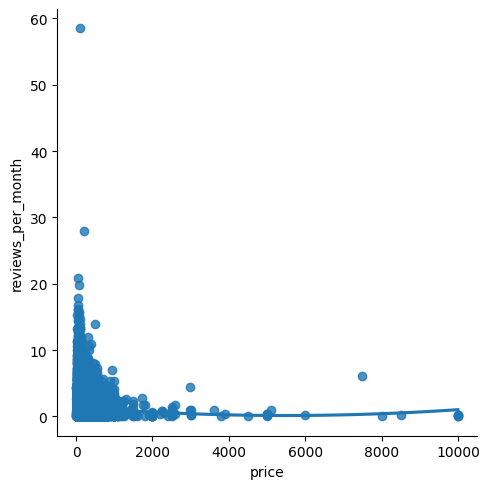

In [77]:
sns.lmplot(x ="price", y ="reviews_per_month", data = df, order = 2, ci = None)


In [78]:
df.fillna(method ='ffill', inplace = True)


/home/cj/azuredatastudio-python/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [79]:

X = np.array(df['price']).reshape(-1, 1)
y = np.array(df['reviews_per_month']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


-0.00033033738510579447


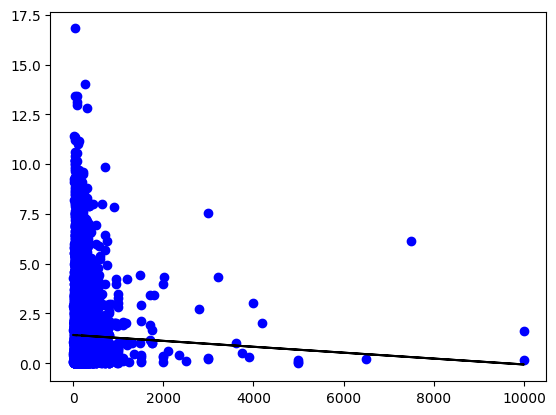

In [80]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()


In [81]:
df2 = df[df['price'] < 1000]


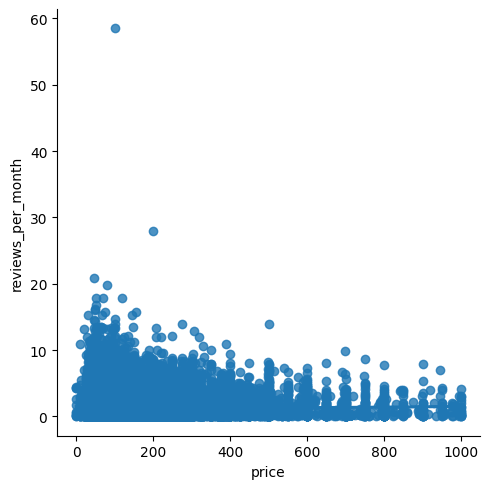

In [82]:
sns.lmplot(x ="price", y ="reviews_per_month", data = df2, order = 2, ci = None)


In [83]:

X = np.array(df2['price']).reshape(-1, 1)
y = np.array(df2['reviews_per_month']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.0005410680891366759


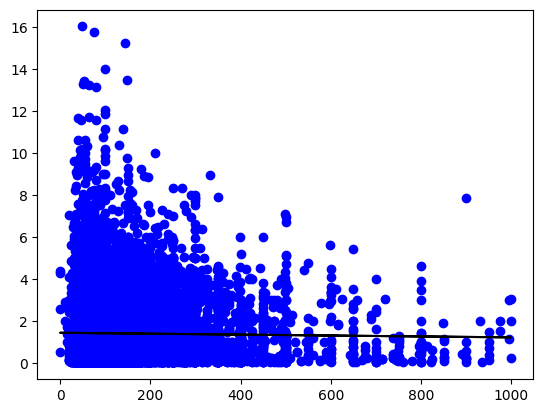

In [84]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
